# Tarea Semanal 4
## Martín Deleón

### Consignas:
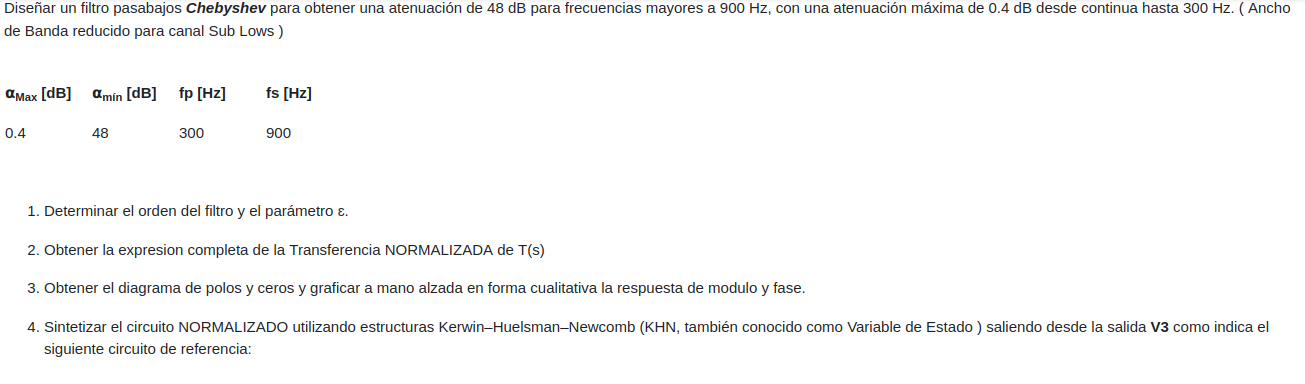
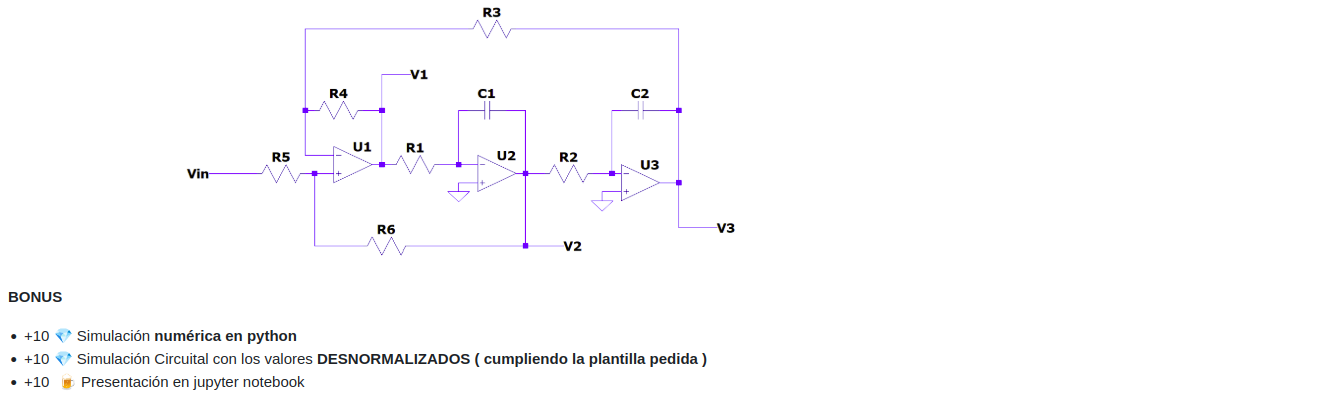

### 1. Determinación del orden y los parámetros de filtrado

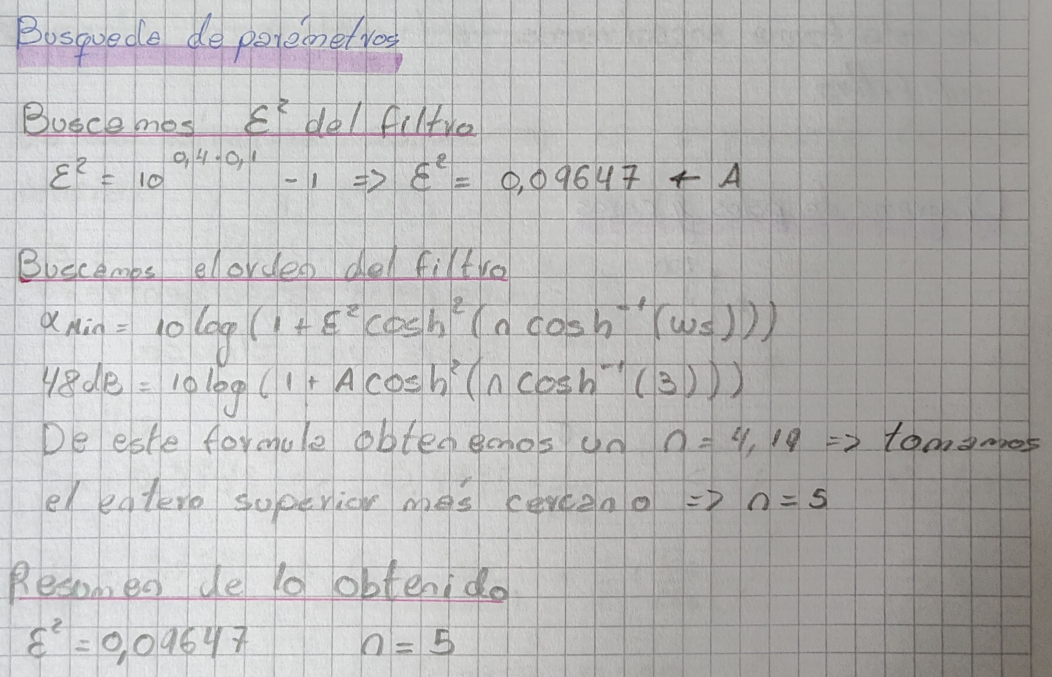

En resumen se encontró un epsilon = 0.09647 y un filtro de orden 5 como minimo. Al igual que en anteriores entregas lo invito a ver el [pdf](https://drive.google.com/file/d/1_BKXce9Wqc7x4mUPKPESQUAIU79w4qtx/view?usp=sharing) de la tarea por separado para facilitar la compresión del procedimiento que intento explicar en este notebook.

### 2. Obtención de la expresión expandida de la transferencia

Para realizar este paso se utilizó python, de esta manera se minimizan los posibles errores y se aliviana mucho el trabajo. A continuación se muestra el codigo utilizado.

In [7]:
#Importamos las librerias necesarias
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt
from pytc2.sistemas_lineales import analyze_sys, pretty_print_lti, tf2sos_analog, pretty_print_SOS

from pytc2.general import Chebyshev_polynomials, s, w, print_subtitle
import sympy as sp
from IPython.display import display

In [8]:
#Cargamos los datos del problema
alfa_max = 0.4 # dB
alfa_min = 48 # dB
ws = 3

#Hacemos cuentas 
eps_sq = 10**(alfa_max/10)-1
eps = np.sqrt(eps_sq)
for nn in range(2,6):
    
    alfa_min_c = 10*np.log10(1 + eps_sq * np.cosh(nn * np.arccosh(ws))**2 )
    # print( 'nn {:d} - alfa_min_cheby {:f}'.format(nn, alfa_min_c) )

    alfa_min_b = 10*np.log10(1 + eps_sq * ws**(2*nn))
    print( 'nn {:d} - alfa_min_butter {:f} - alfa_min_cheby {:f}'.format(nn, alfa_min_b, alfa_min_c) )


nn = 5

nn 2 - alfa_min_butter 9.452092 - alfa_min_cheby 14.606303
nn 3 - alfa_min_butter 18.532881 - alfa_min_cheby 29.761586
nn 4 - alfa_min_butter 28.020848 - alfa_min_cheby 45.067943
nn 5 - alfa_min_butter 37.557179 - alfa_min_cheby 60.378833


En este caso no se realizó la iteración de la formula con distintos n, sino que se metió la formula en la calculadora y se le pidió que determine el valor. De esta forma obtenemos n = 4,19. Finalmente dado que n tiene que ser un número entero se utilizó un orden 5.

In [9]:
#Trabajamos de manera simbólica
chebn_expr = Chebyshev_polynomials(nn)
display(sp.expand(chebn_expr))
#Obtenemos el polinomio de chebyshev de orden 5 y lo mostramos

Tcsq_den_jw = (1 + eps_sq*chebn_expr**2 )
Tcsq_jw = 1/Tcsq_den_jw
display(sp.expand(Tcsq_jw))
#Las lineas anteriores nos permiten hallar la expresión ampliada de la transferencia
#Dado que es un polinomio de orden 10, resulta muy conveniente poder hacer esto.


16*w**5 - 20*w**3 + 5*w

1/(24.6984182126554*w**10 - 61.7460455316385*w**8 + 54.0277898401837*w**6 - 19.295639228637*w**4 + 2.41195490357963*w**2 + 1)

In [10]:
#Remplazamos w por s/j
j = sp.I

Tcsq_s = Tcsq_jw.subs(w, s/j)
display(sp.expand(Tcsq_s))


1/(-24.6984182126554*s**10 - 61.7460455316385*s**8 - 54.0277898401837*s**6 - 19.295639228637*s**4 - 2.41195490357963*s**2 + 1)

De esta forma obtenemos la transferencia en unos pocos pasos.
Ahora nos falta obtener los polos de esta transferencia para poder factorizarla.

In [11]:
Cn5 = np.array([16, 0, -20, 0, 5, 0])
Cn5sq = np.polymul( Cn5, Cn5)
Tcsq_den_jw = np.polyadd( np.array([1.]), Cn5sq * eps_sq ) 

# convierto a s
Tcsq_den_s = Tcsq_den_jw * np.array([-1,-1,1,-1,-1,-1,1,-1,-1,1,1])
roots_Tcsq_den_s = np.roots(Tcsq_den_s)
print(roots_Tcsq_den_s)



[ 0.11932228+1.01949544j  0.11932228-1.01949544j -0.11932228+1.01949544j
 -0.11932228-1.01949544j  0.31238979+0.63008283j  0.31238979-0.63008283j
 -0.31238979+0.63008283j -0.31238979-0.63008283j -0.38613502+0.j
  0.38613502+0.j        ]


Dado que únicamente nos importan los polos del semiplano izquierdo hacemos lo siguiente:


In [12]:
roots_Tcsq_den_s = roots_Tcsq_den_s[np.real(roots_Tcsq_den_s) < 0]
print(roots_Tcsq_den_s)

[-0.11932228+1.01949544j -0.11932228-1.01949544j -0.31238979+0.63008283j
 -0.31238979-0.63008283j -0.38613502+0.j        ]


Luego de utilizar este codigo pasamos esto al cuaderno de la siguiente manera.
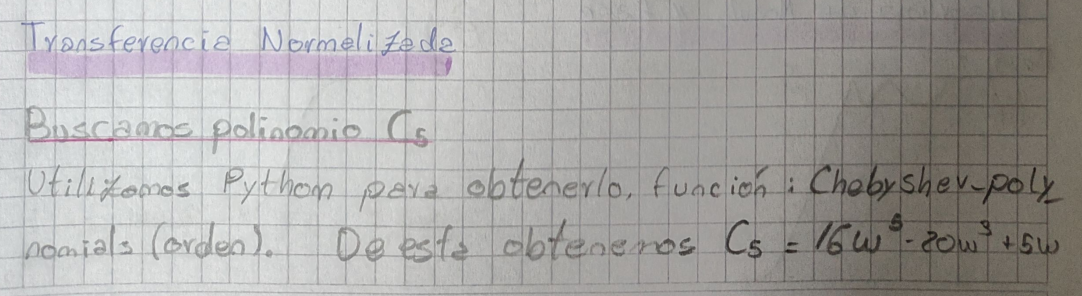
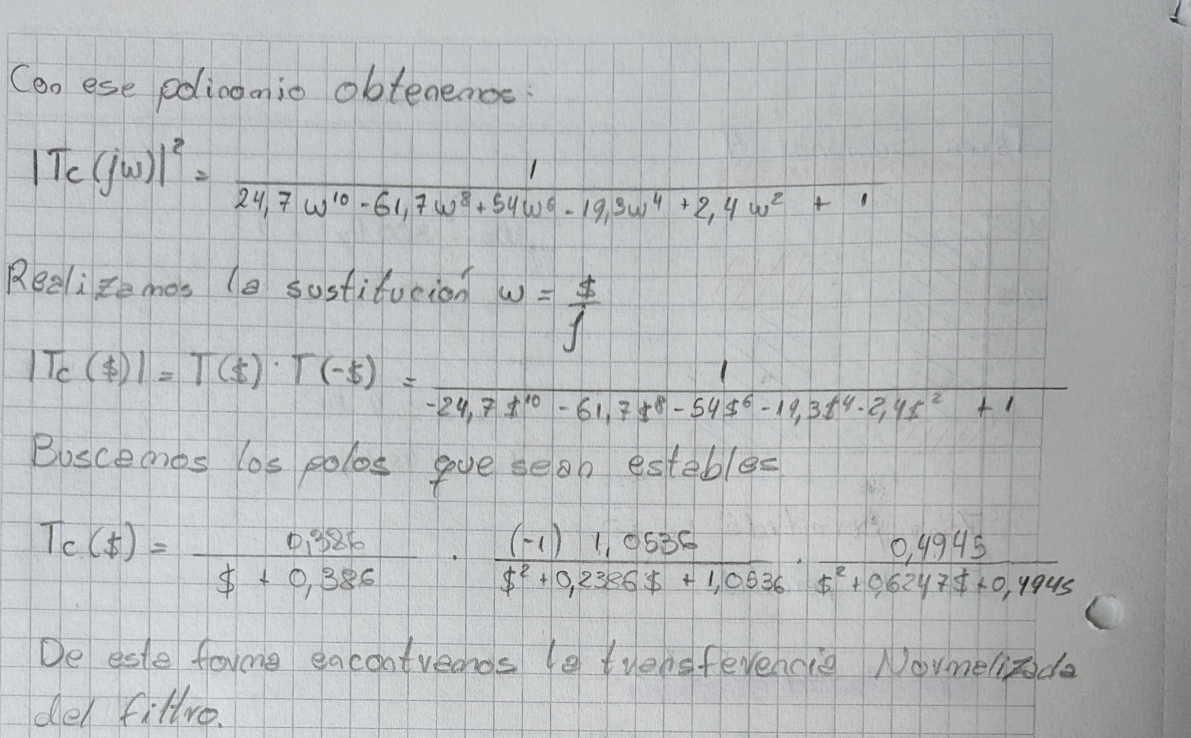


### 3. Diagrama de polos y ceros

Antes de verificar con la simulación en python, podemos adelantar que los polos se encontraran situados en una elipse, y al menos un polo debe estar en el eje real.
Entonces adelantamos que los polos estaran situados de la siguiente manera:

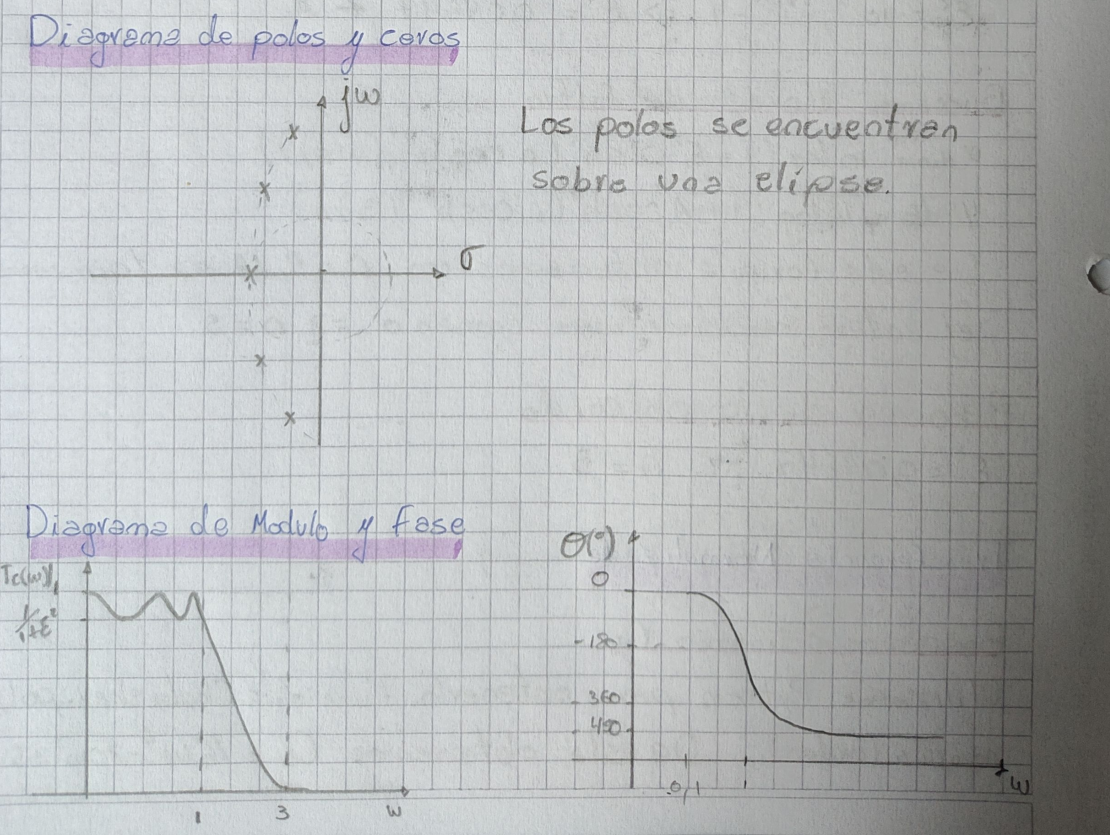

En la parte inferior de la imágen también se puede observar el diagrama aproximado de modulo y fase.

### 4. Síntesis del circuito 
En este punto, primero se calculo la transferencia de la estructura dada y luego por igualación se obtienen los valores de los componentes.

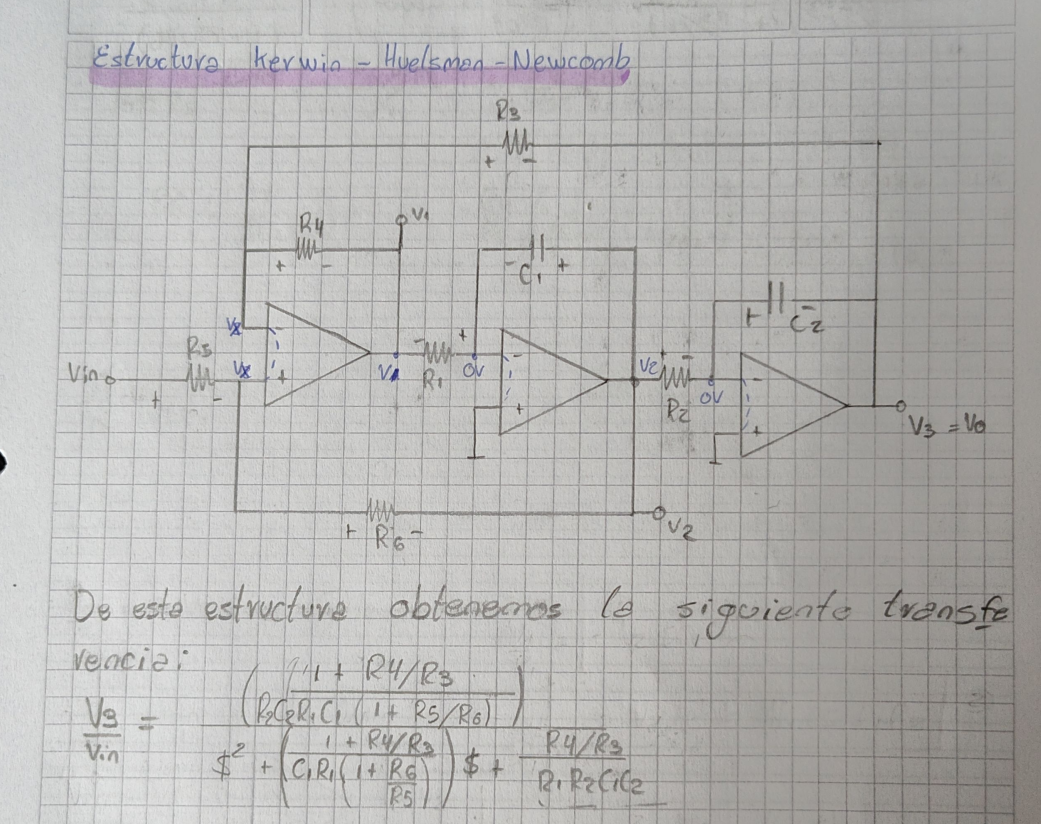
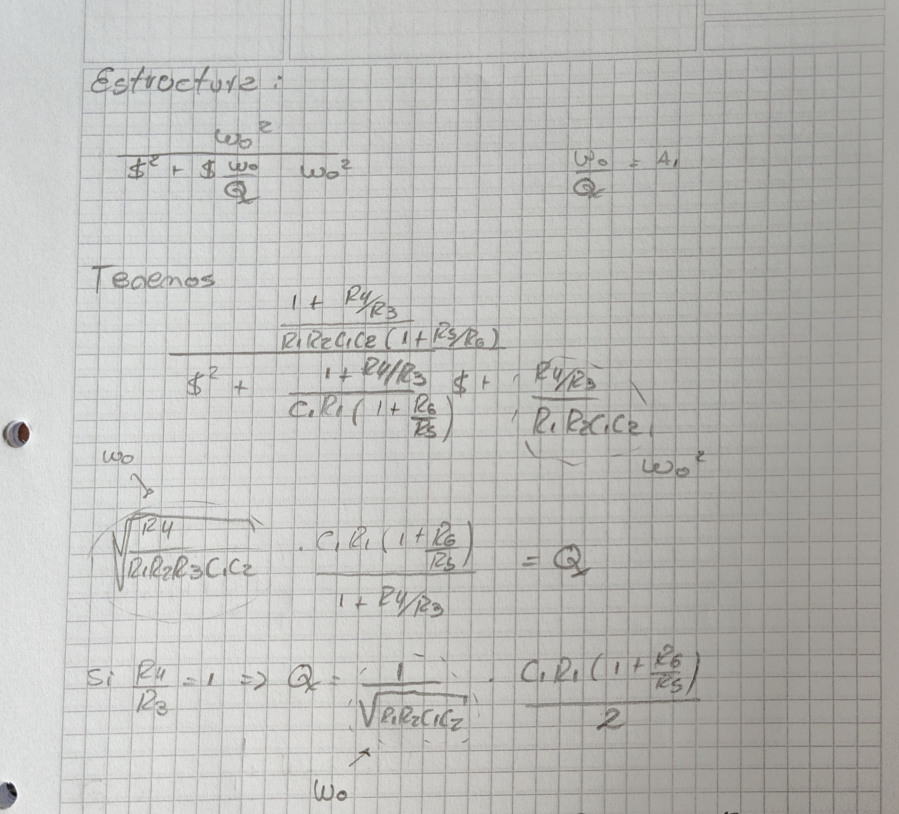

En este punto parece que no se puede ajustar la frecuencia sin modificar el "Q" de cada filtro, sin embargo, si R1 = R2 y C1 = C2, entonces obtenemos:

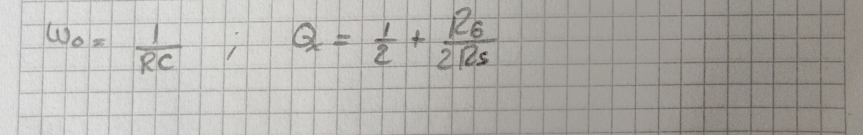

Por último realizamos la igualación con las transferencias encontradas anteriormente y obtenemos los valores de las resistencias y capacitores.

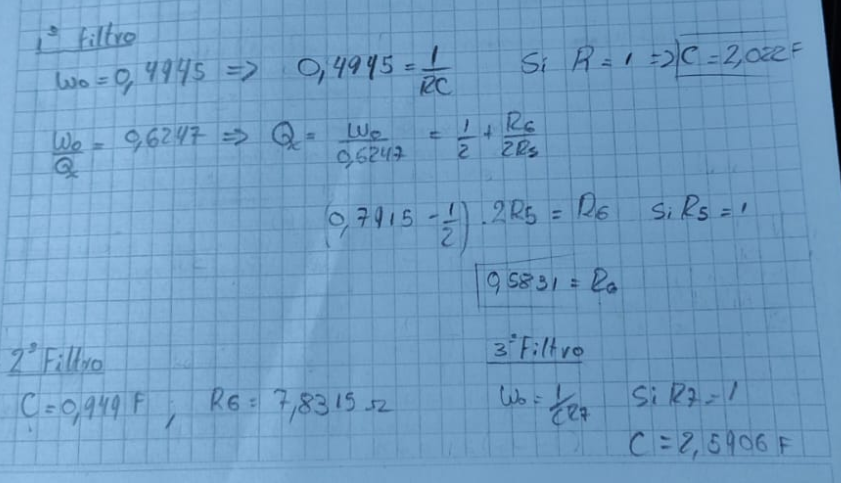


### 5. Simulaciones
Primero realizamos las simulaciones circuitales.
El circuito a simular es el siguiente:

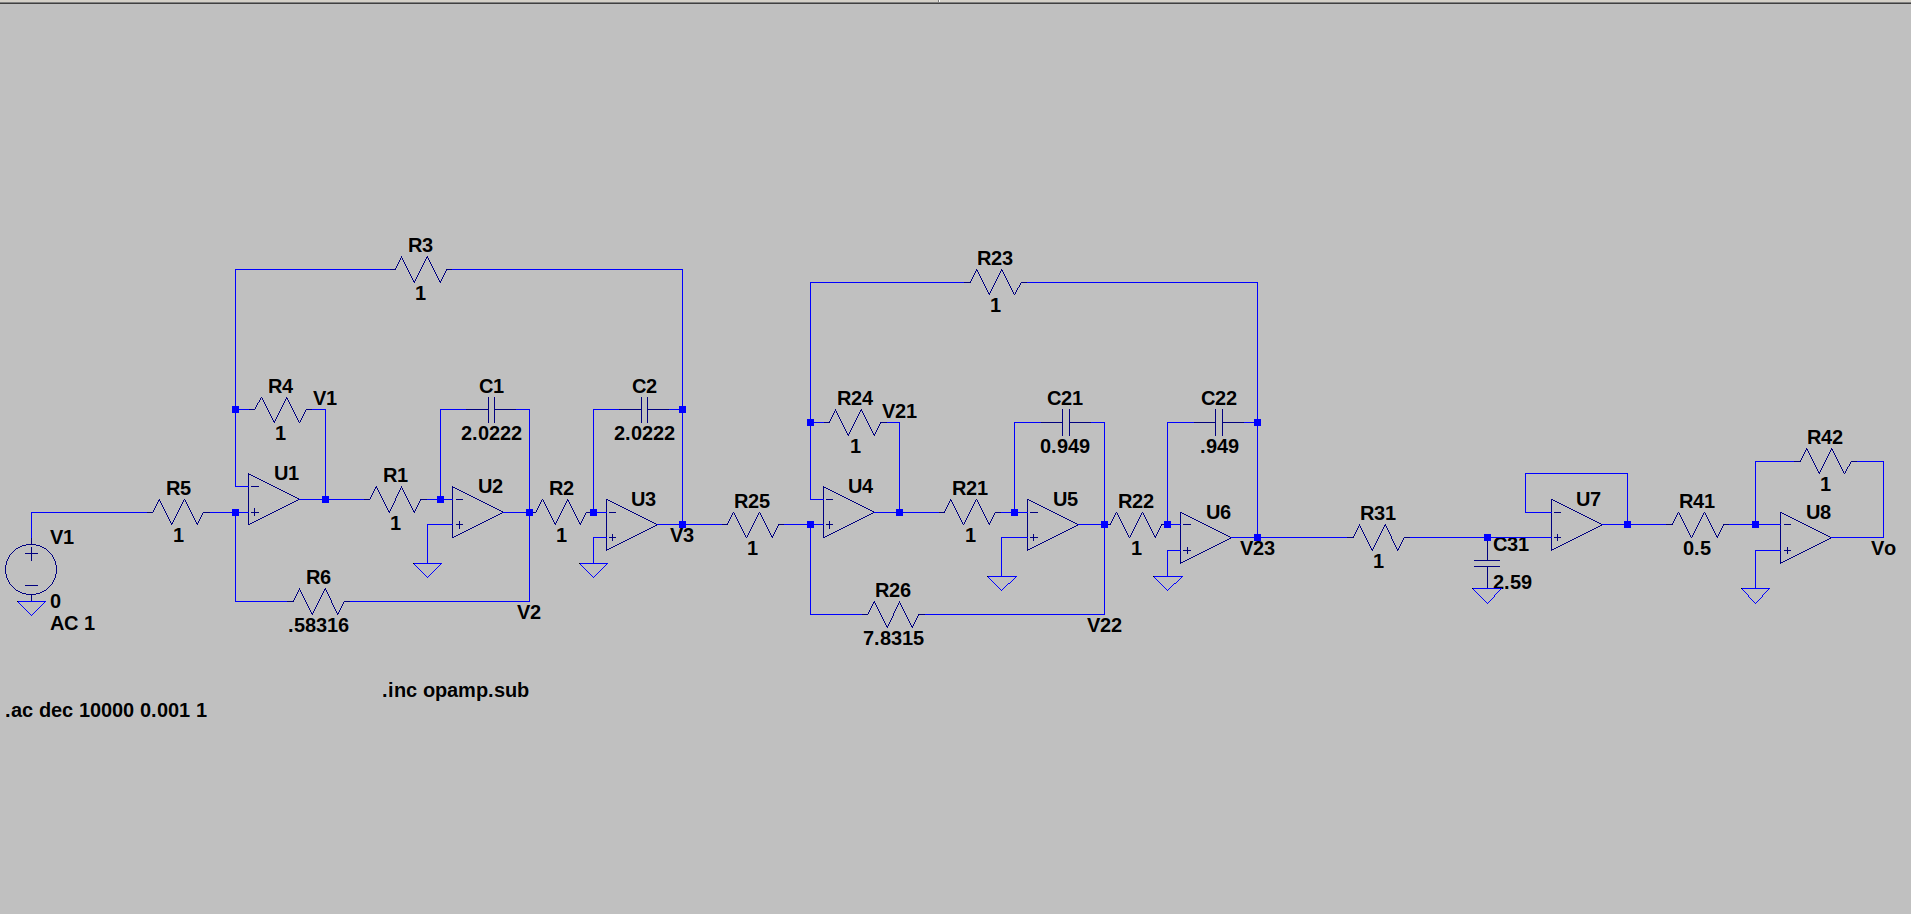

En donde se puede ver que se colocó un amplificador como última etapa para compensar las atenuaciones de los propios filtros.

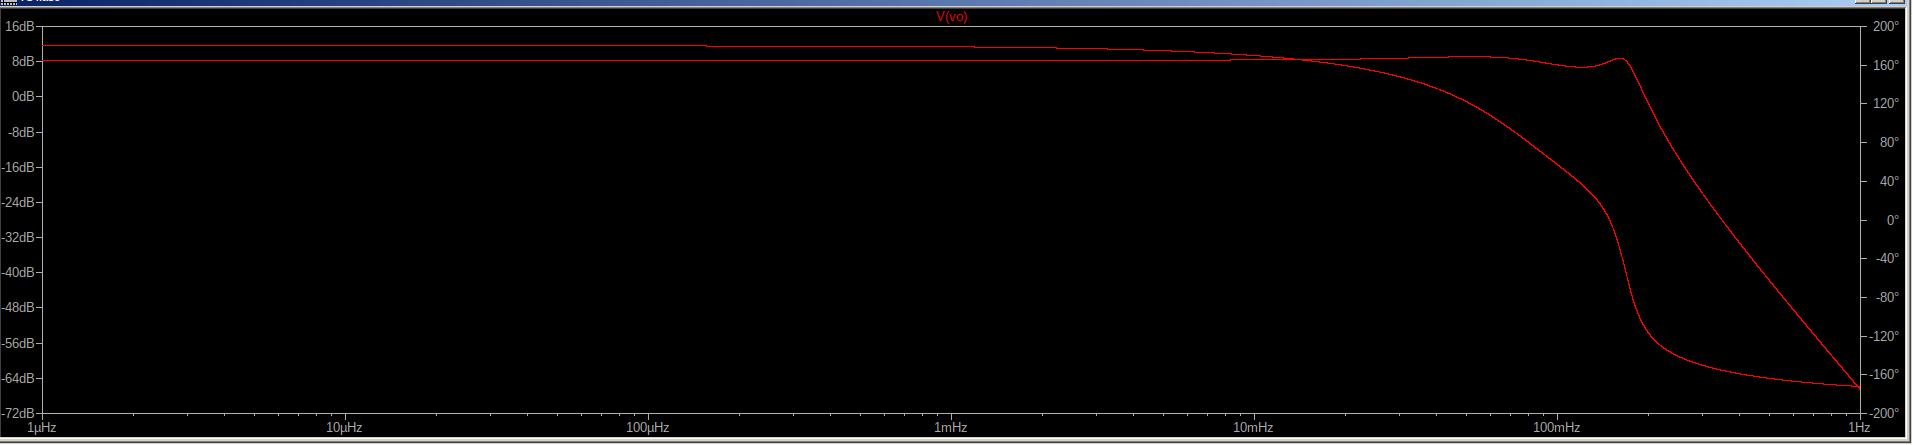
Luego se procede a realizar la simulación númerica:

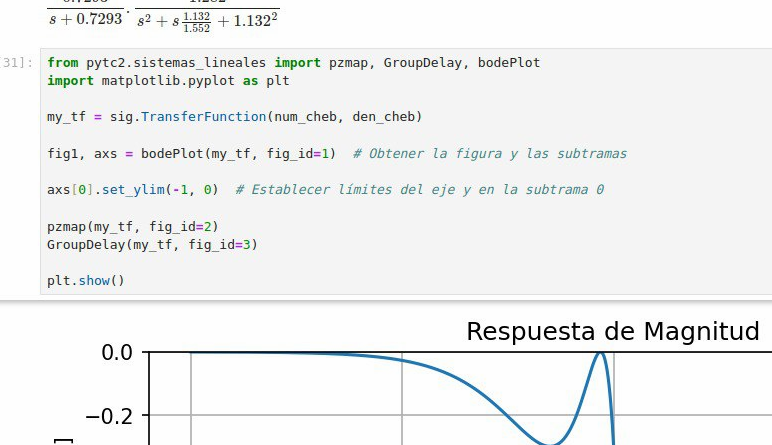

#### Cheby_ord_5_rip_0.4_att_48

<IPython.core.display.Math object>

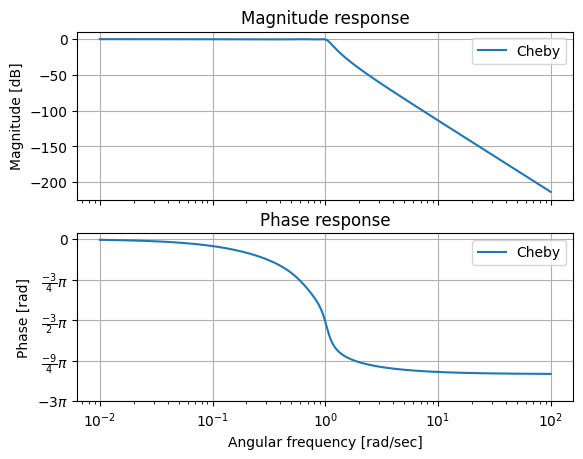

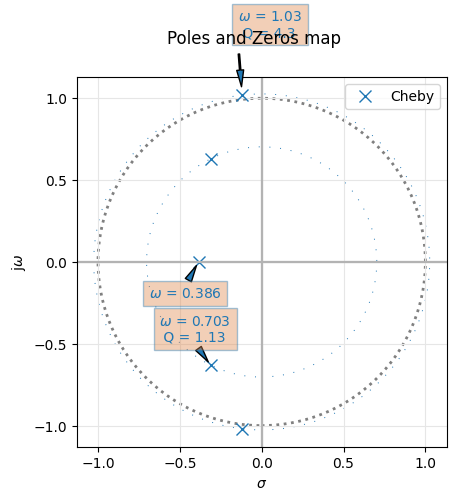

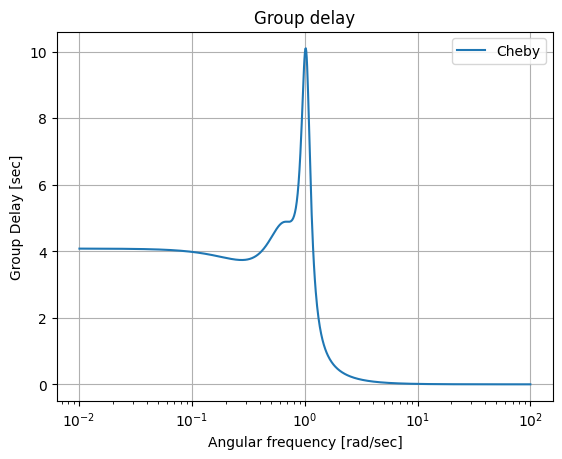

In [20]:
z,p,k = sig.cheb1ap(nn, alfa_max)
num_cheb, den_cheb = sig.zpk2tf(z,p,k)

filter_names = ['Cheby']
all_sys = []

this_aprox = 'Cheby'
this_label = this_aprox + '_ord_' + str(nn) + '_rip_' + str(alfa_max) + '_att_' + str(alfa_min)

sos_cheb = tf2sos_analog(num_cheb, den_cheb)


filter_names.append(this_label)
all_sys.append(sig.TransferFunction(num_cheb, den_cheb))

analyze_sys( all_sys, filter_names )
print_subtitle(this_label)
# factorizamos en SOS's
pretty_print_SOS(sos_cheb, mode='omegayq')
